# Load libraries

In [100]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statistics as stat
from sklearn.neighbors import KNeighborsRegressor

# Load data

In [3]:
crop=pd.read_csv('../data/raw/Crop_recommendation.csv')
display(crop.head())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
crop.shape

(2200, 8)

In [7]:
crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
crop['label'].nunique()

22

# __Checking class imbalance__

In [10]:
crop['label'].value_counts(dropna=False)

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

It looks like the data is perfectly clean with  balanced proportion.

# Plotting Raw Data


In [11]:
sns.set(style="whitegrid")
palette=sns.color_palette("summer")

In [12]:
crop.shape

(2200, 8)

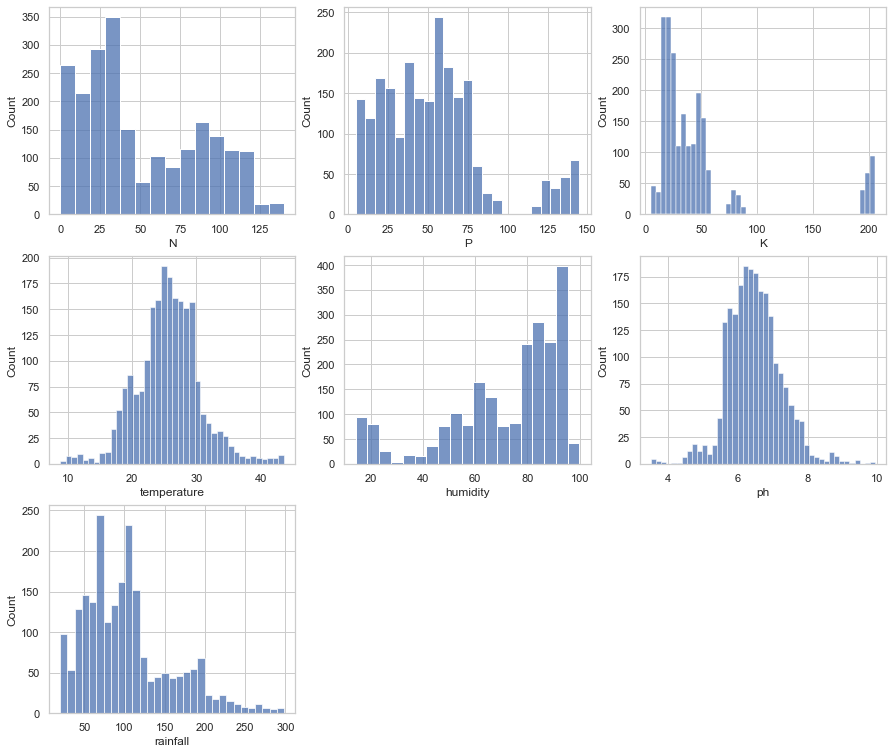

In [13]:
all_columns = crop.columns[:-1]

histogram = plt.figure(figsize=(15,13))
i = 1
for column in all_columns:
    plt.subplot(3,3,i)
    sns.histplot(crop[column])
    i+=1
plt.show()

#sns.histplot(crop[all_columns[-1]])
#plt.show()

In [14]:
histogram.savefig('Histplot.jpg')

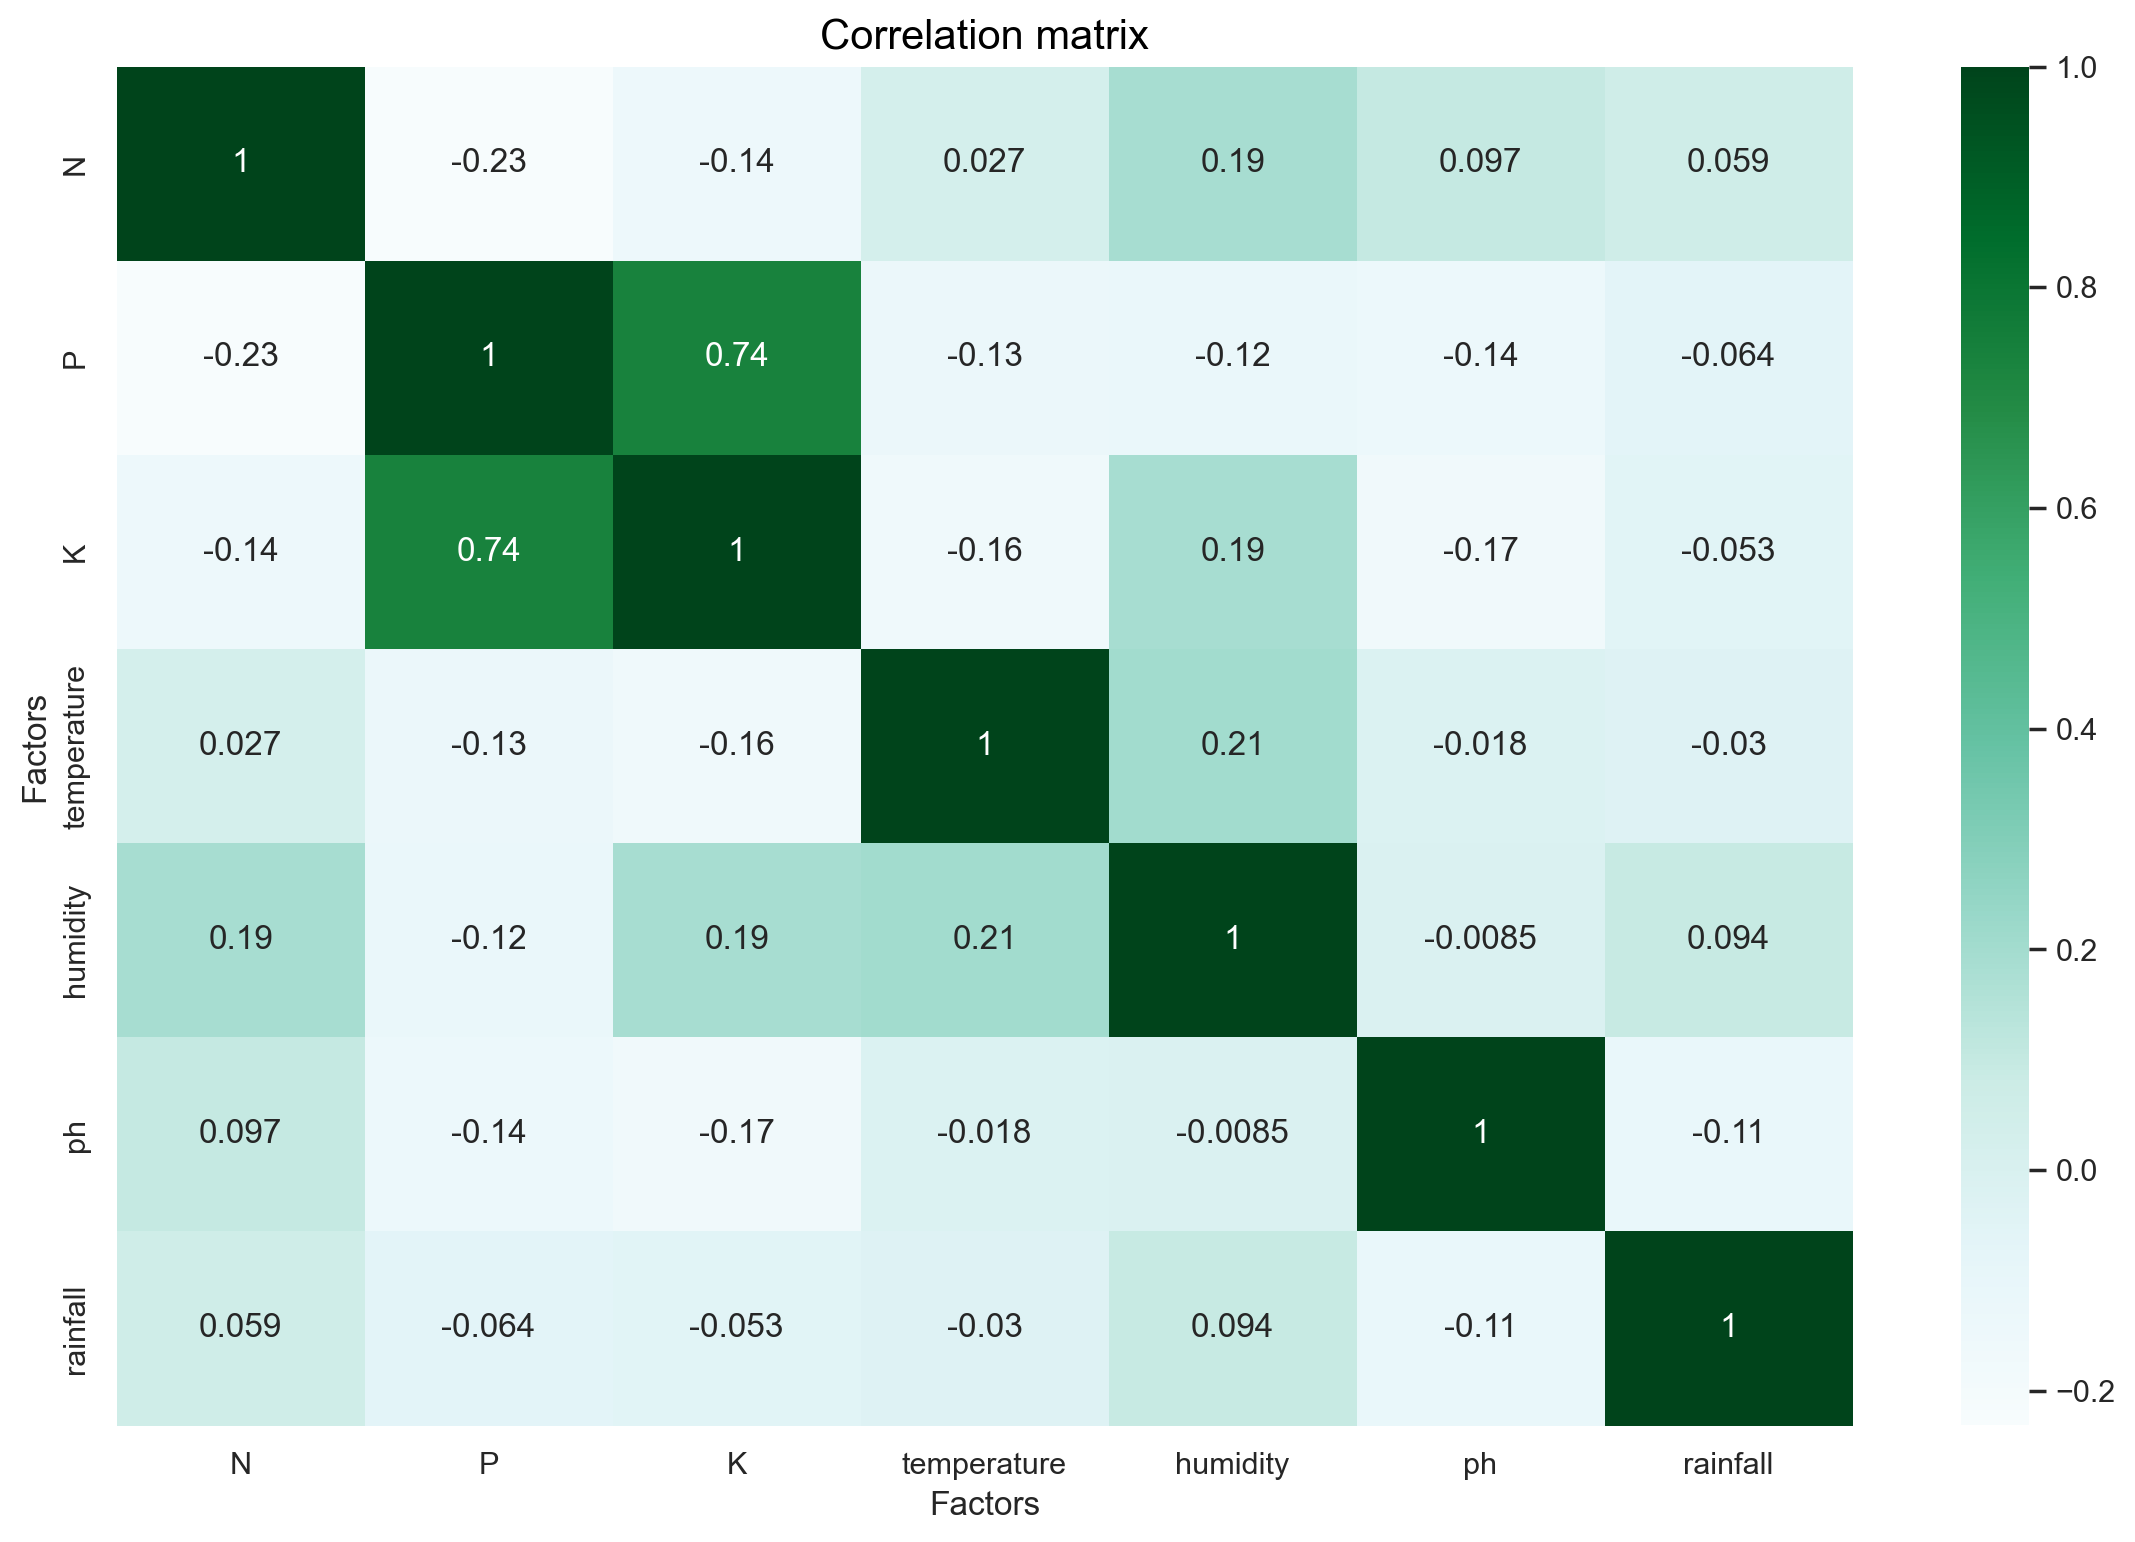

In [15]:
#Correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(14, 9), dpi=200)
sns.heatmap(crop.corr(), annot=True,cmap='BuGn')
ax.set(xlabel='Factors')
ax.set(ylabel='Factors')

plt.title('Correlation matrix', fontsize = 15, c='black')
plt.show()
fig.savefig('Factors.jpg')

Based on crop if rel between P and K.
Plot distribution of K  and P for every possible crop
Drop one of them
Similar then drop

"rice" , "wheet", = "wheet", "rice"
Get unique K, P of crops. sns.histplot(data= df[df['crop'].isin([crop1, crop2])]['K'], hue="crop")
sns.histplot(data= df[df['crop'].isin([crop1, crop2])]['P'], hue="crop")

How to get unique pairs in python

coor_rice = df[df[crop]=="rice"].corr()

# Should we drop one of K and P?

<AxesSubplot:xlabel='K', ylabel='Count'>

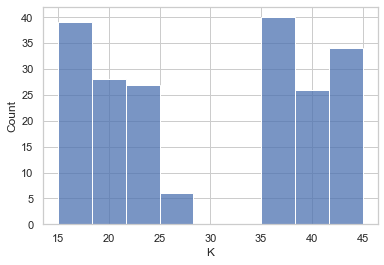

In [16]:
sns.histplot(data = crop[crop['label'].isin(['rice', 'maize'])]['K'])

<AxesSubplot:xlabel='P', ylabel='Count'>

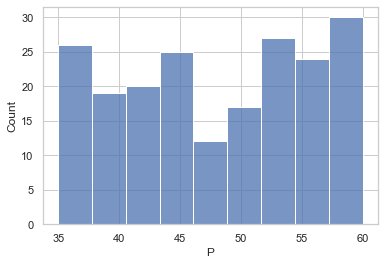

In [17]:
sns.histplot(data = crop[crop['label'].isin(['rice', 'maize'])]['P'])

Seems like they are not similar. Let's try with another pair.

<AxesSubplot:xlabel='K', ylabel='Count'>

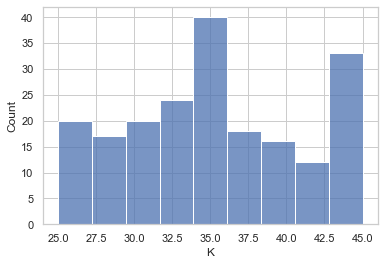

In [18]:
sns.histplot(data = crop[crop['label'].isin(['jute', 'coconut'])]['K'])

<AxesSubplot:xlabel='P', ylabel='Count'>

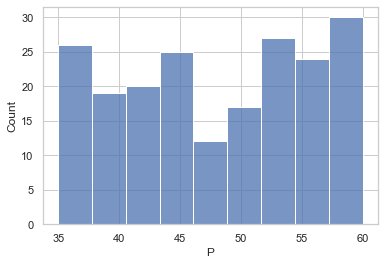

In [19]:
sns.histplot(data = crop[crop['label'].isin(['rice', 'maize'])]['P'])

## K and P for all crops

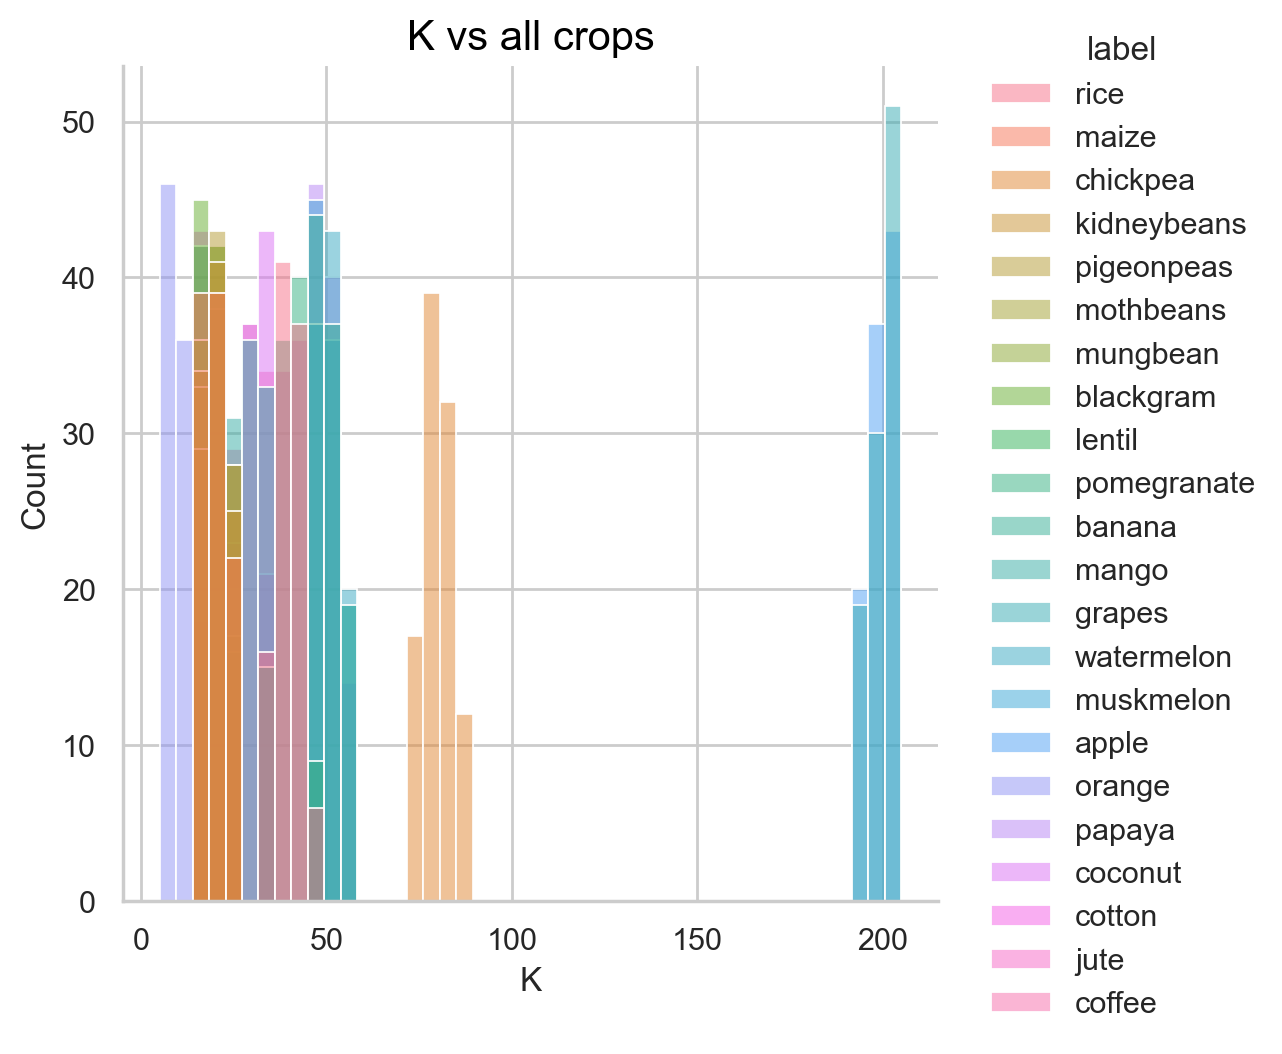

In [34]:
K_crops = sns.displot(crop, x="K", hue="label")
K_crops.fig.set_dpi(200)#
plt.title('K vs all crops', fontsize = 15, c='black')
plt.show()

K_crops.fig.savefig("K_crops.jpg", transparent=True)

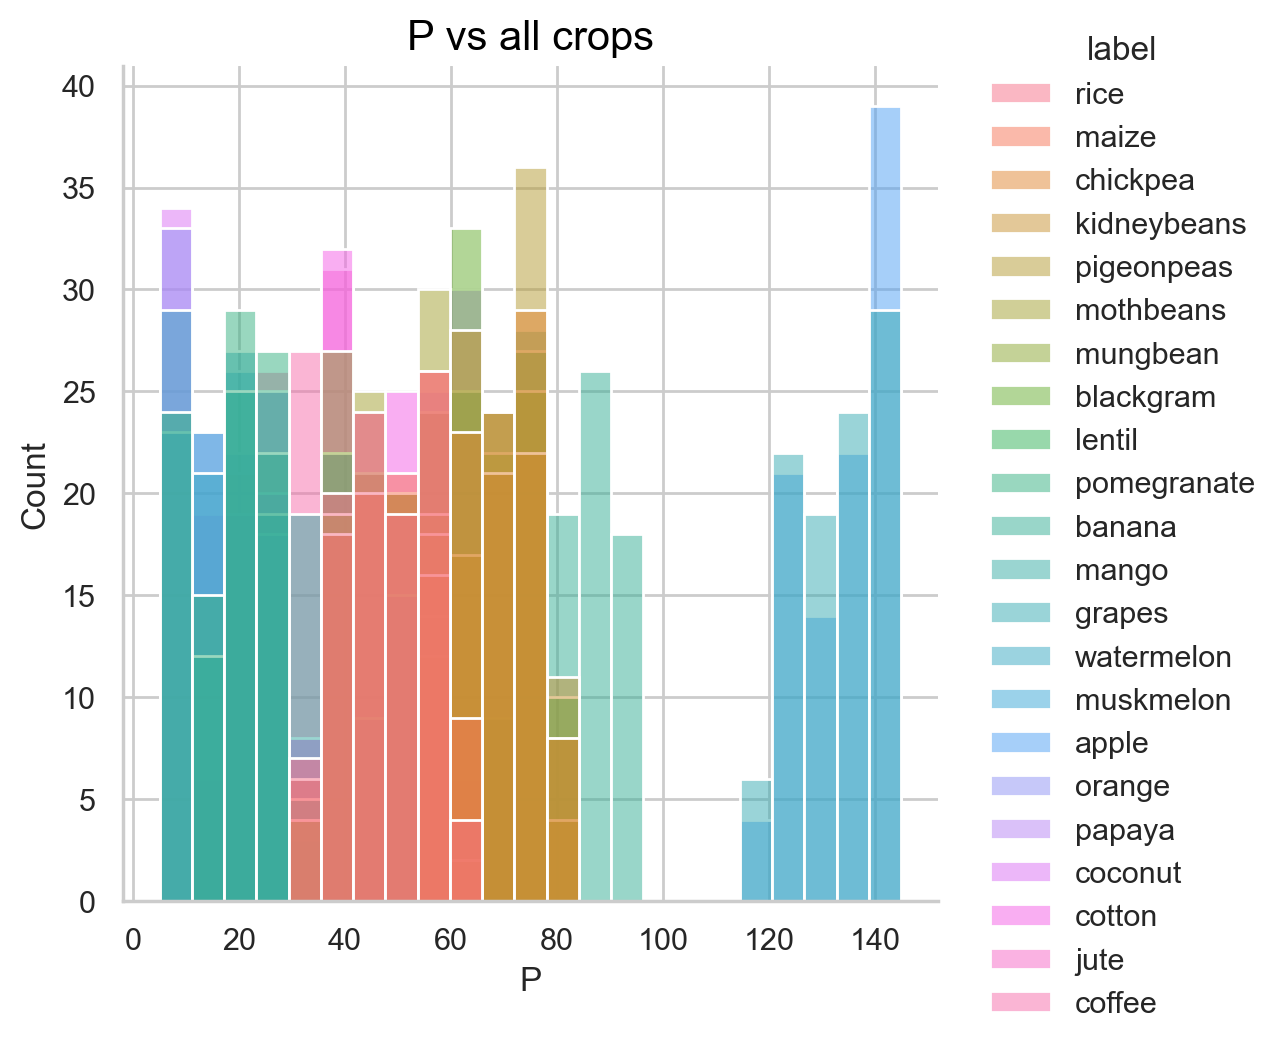

In [33]:
P_crops = sns.displot(crop, x="P", hue="label")
P_crops.fig.set_dpi(200)#
plt.title('P vs all crops', fontsize = 15, c='black')
plt.show()

P_crops.fig.savefig("P_crops.jpg", transparent=True)

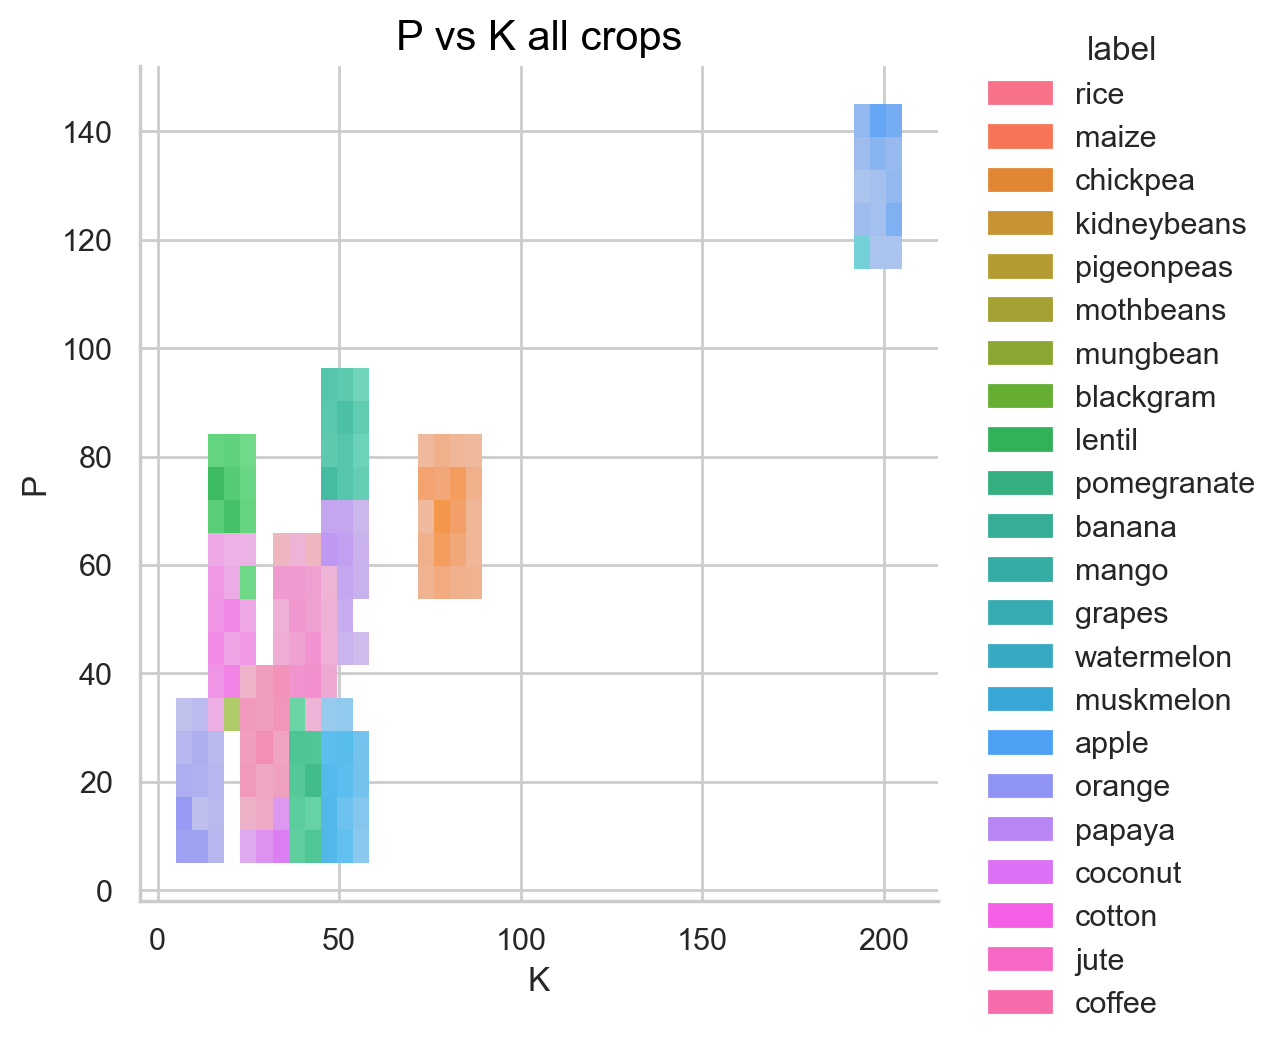

In [38]:
K_P_crops = sns.displot(crop, x="K", y="P", hue="label")

K_P_crops.fig.set_dpi(200)#
plt.title('P vs K all crops', fontsize = 15, c='black')
plt.show()

K_P_crops.fig.savefig("K_P_crops.jpg", transparent=True)

This is for pairing crops for K and P:
list_crops = list(crop['label'])
list_crops
from itertools import combinations
list_combination=[",".join(map(str, comb)) for comb in combinations(list_crops, 2)]

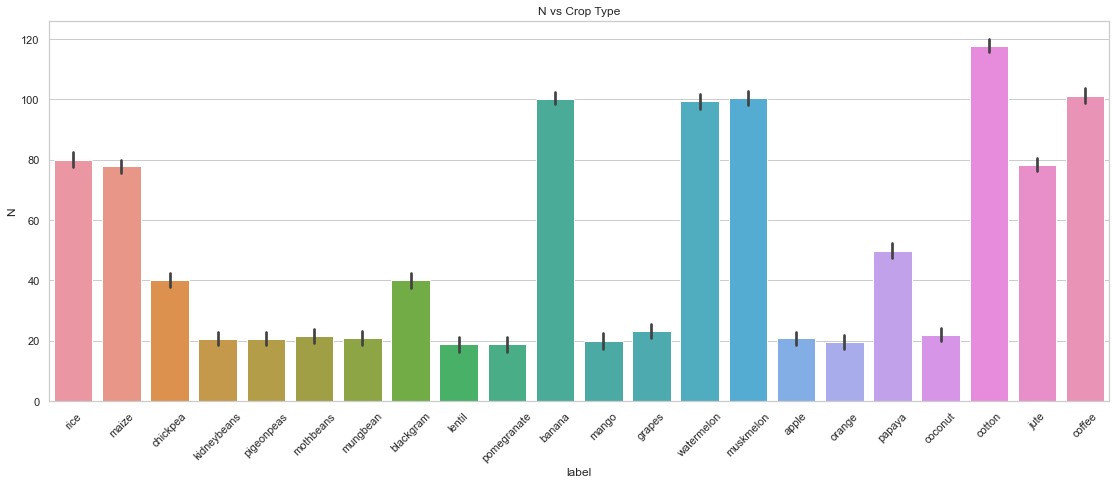

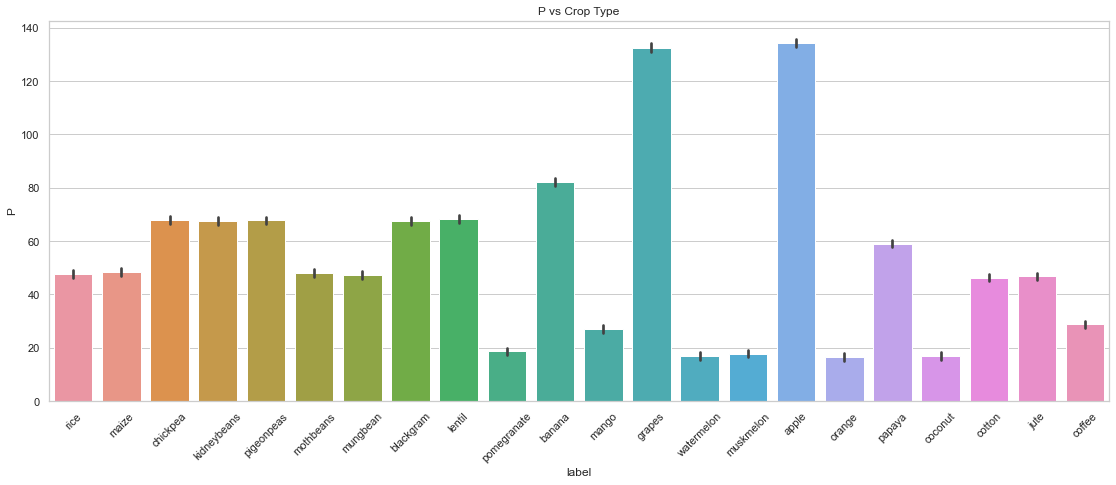

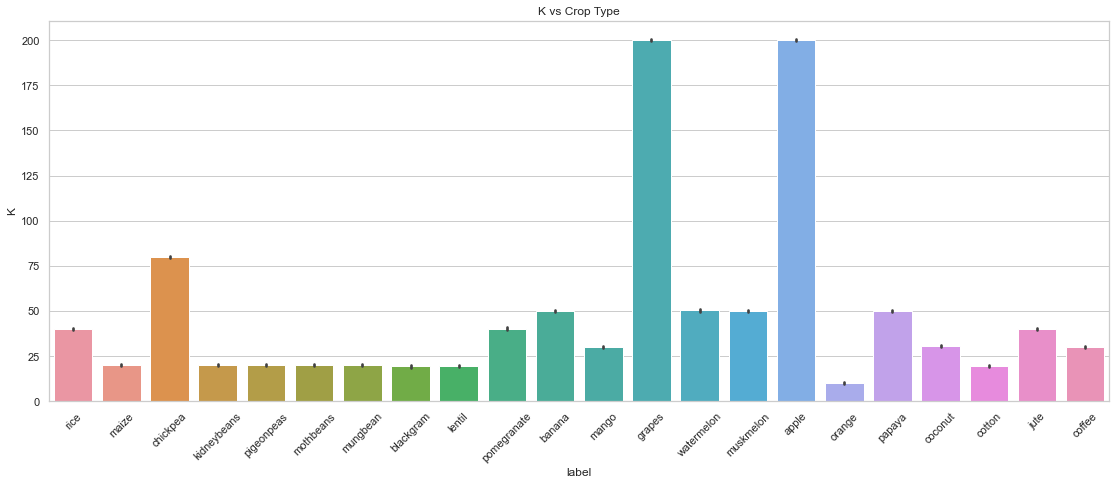

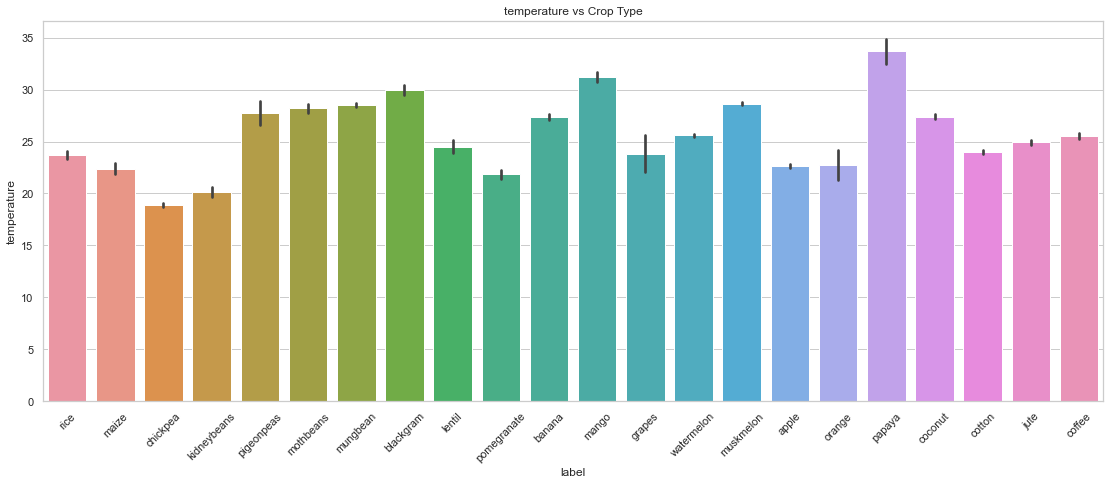

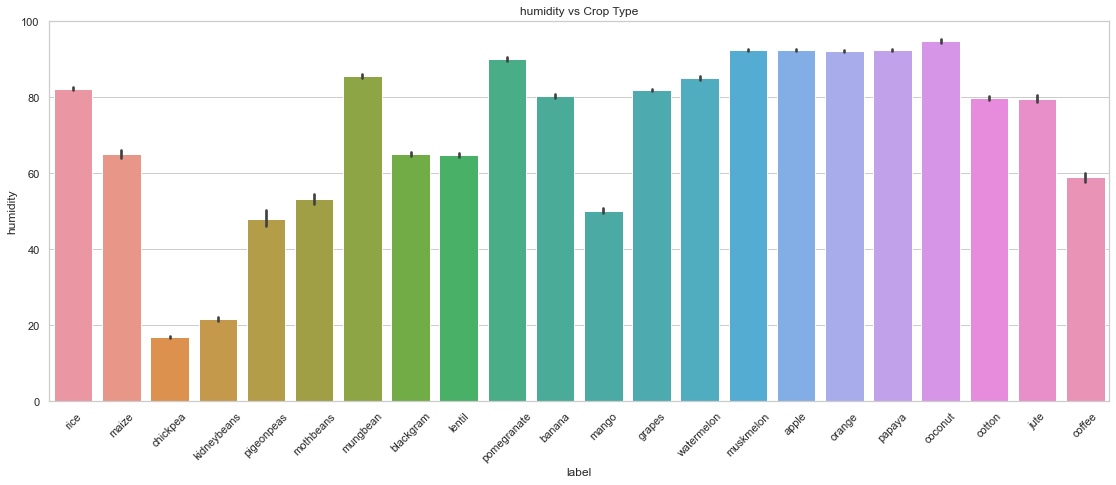

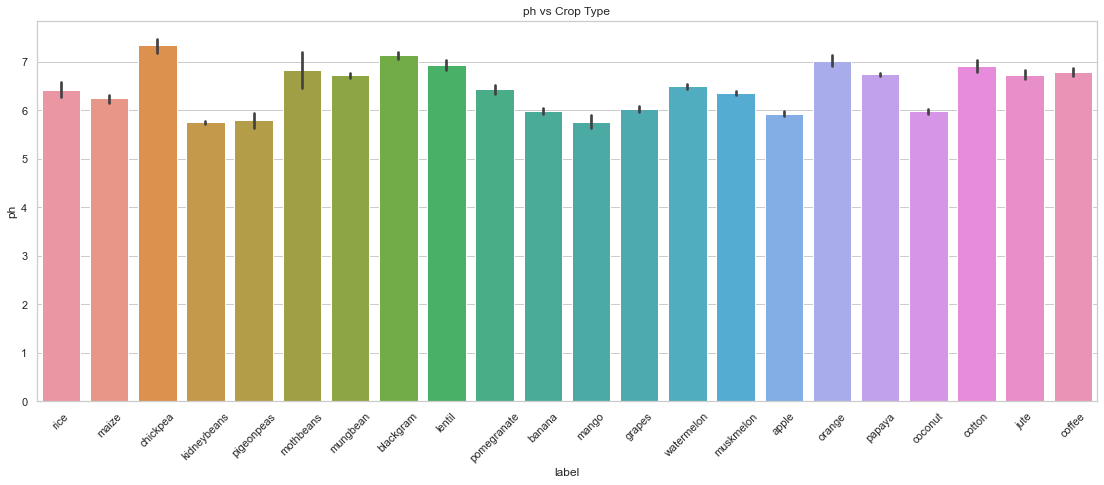

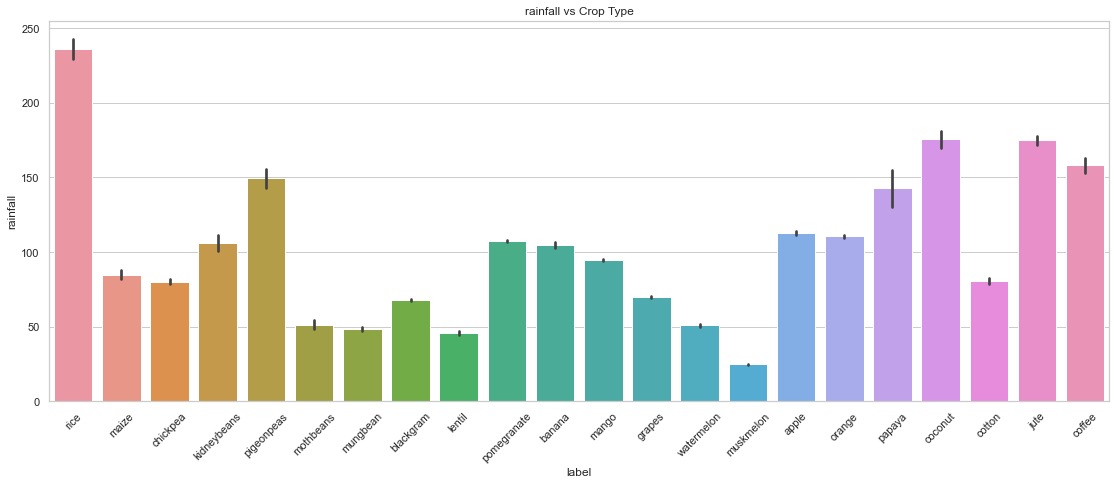

In [39]:
for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = crop)
    plt.xticks(rotation=45)
    plt.title(f"{column} vs Crop Type")
    plt.savefig(f"{column} vs Crop Type")
    plt.show()


In [41]:
corr_rice = crop[crop["label"]=="rice"].corr()

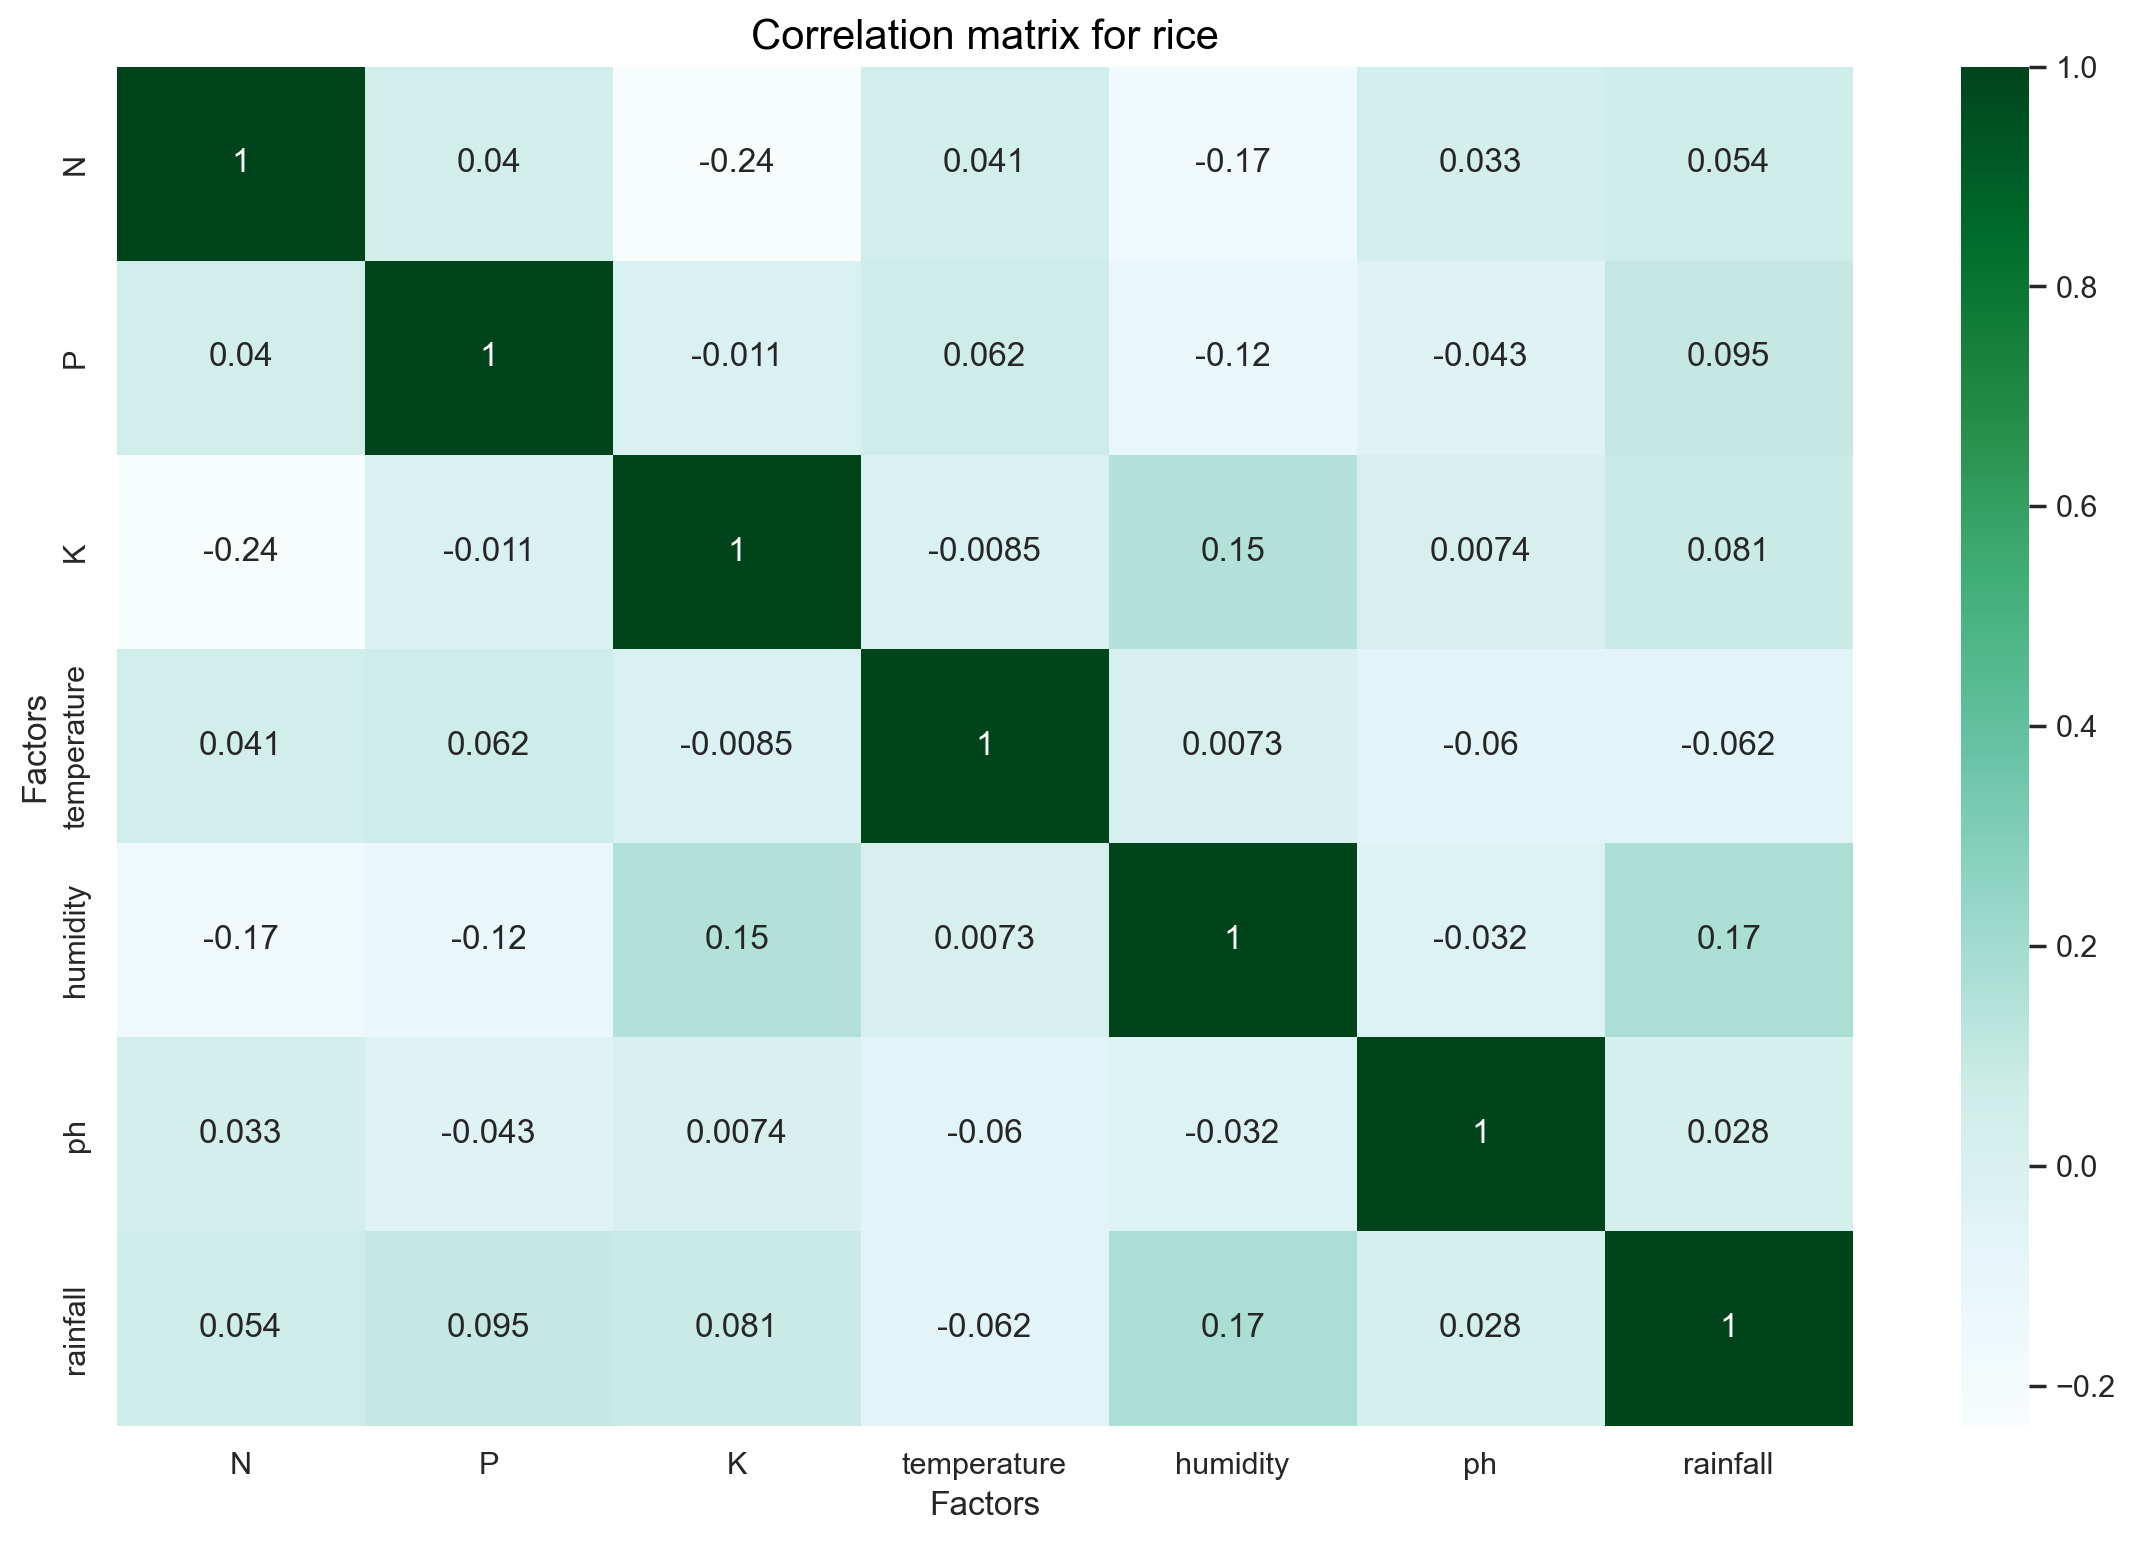

In [42]:
#Correlation matrix
rice, ax = plt.subplots(1, 1, figsize=(14, 9), dpi=200)
sns.heatmap(corr_rice, annot=True,cmap='BuGn')
ax.set(xlabel='Factors')
ax.set(ylabel='Factors')

plt.title('Correlation matrix for rice', fontsize = 15, c='black')
plt.show()
rice.savefig('corr_rice.jpg')

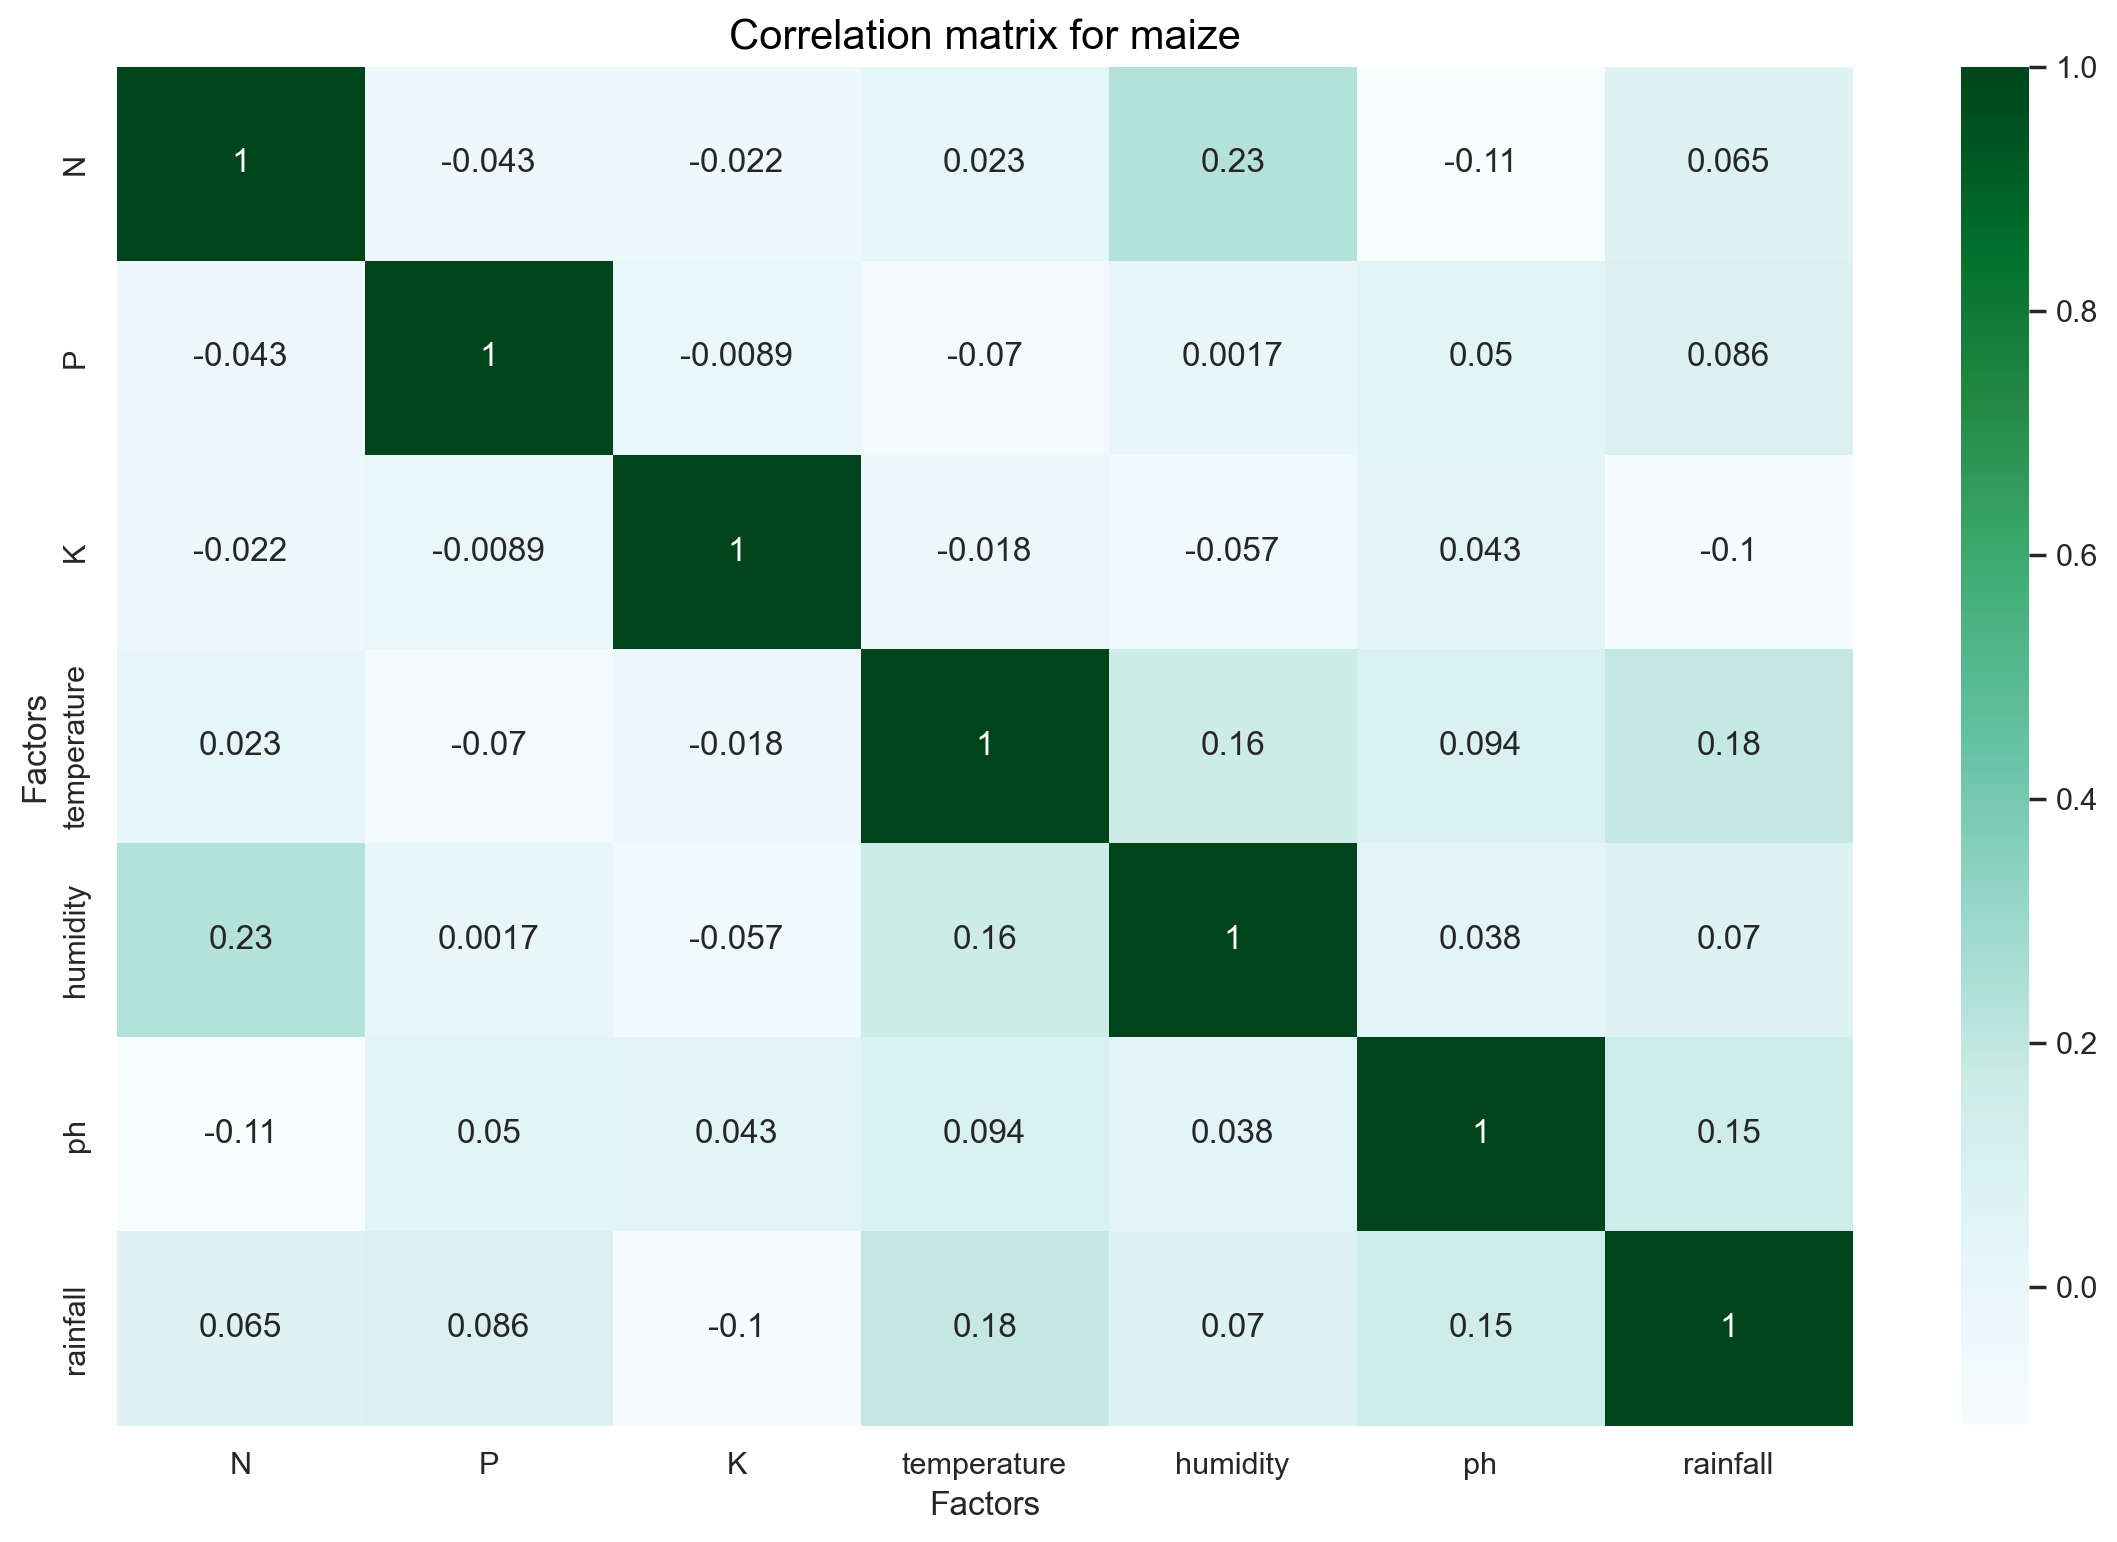

In [43]:
corr_maize = crop[crop["label"]=="maize"].corr()

maize, ax = plt.subplots(1, 1, figsize=(14, 9), dpi=200)
sns.heatmap(corr_maize, annot=True,cmap='BuGn')
ax.set(xlabel='Factors')
ax.set(ylabel='Factors')

plt.title('Correlation matrix for maize', fontsize = 15, c='black')
plt.show()
maize.savefig('corr_maize.jpg')

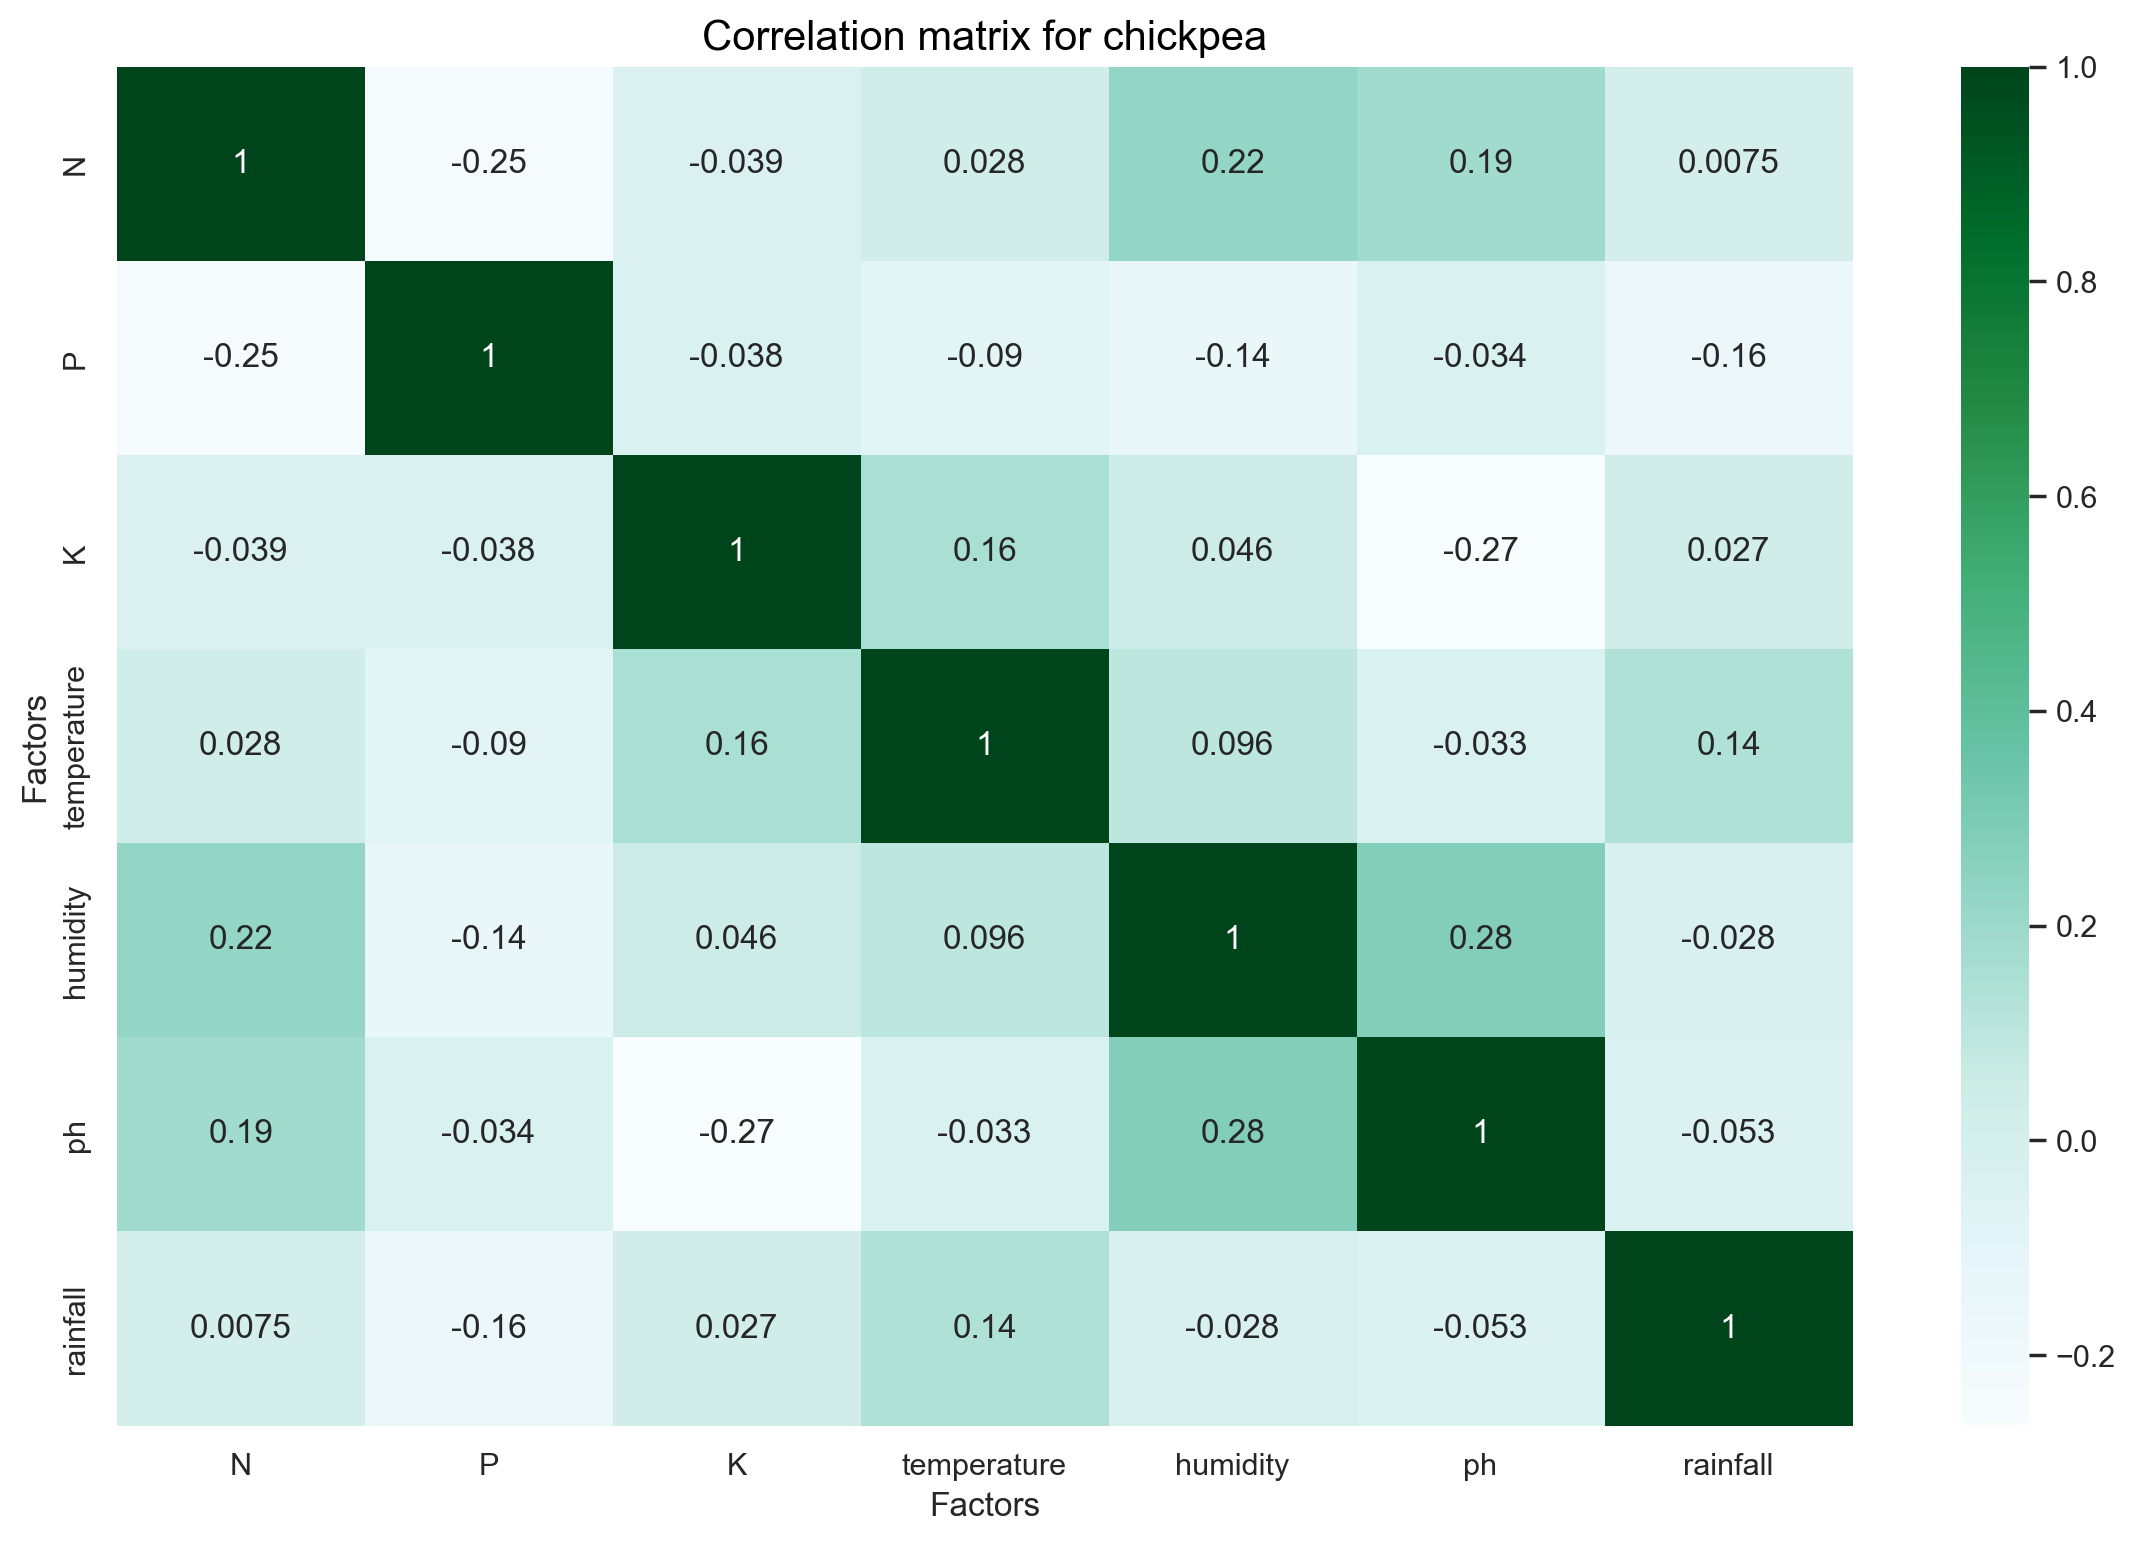

In [44]:
corr_chickpea = crop[crop["label"]=="chickpea"].corr()

chickpea, ax = plt.subplots(1, 1, figsize=(14, 9), dpi=200)
sns.heatmap(corr_chickpea, annot=True,cmap='BuGn')
ax.set(xlabel='Factors')
ax.set(ylabel='Factors')

plt.title('Correlation matrix for chickpea', fontsize = 15, c='black')
plt.show()
chickpea.savefig('corr_chickpea.jpg')

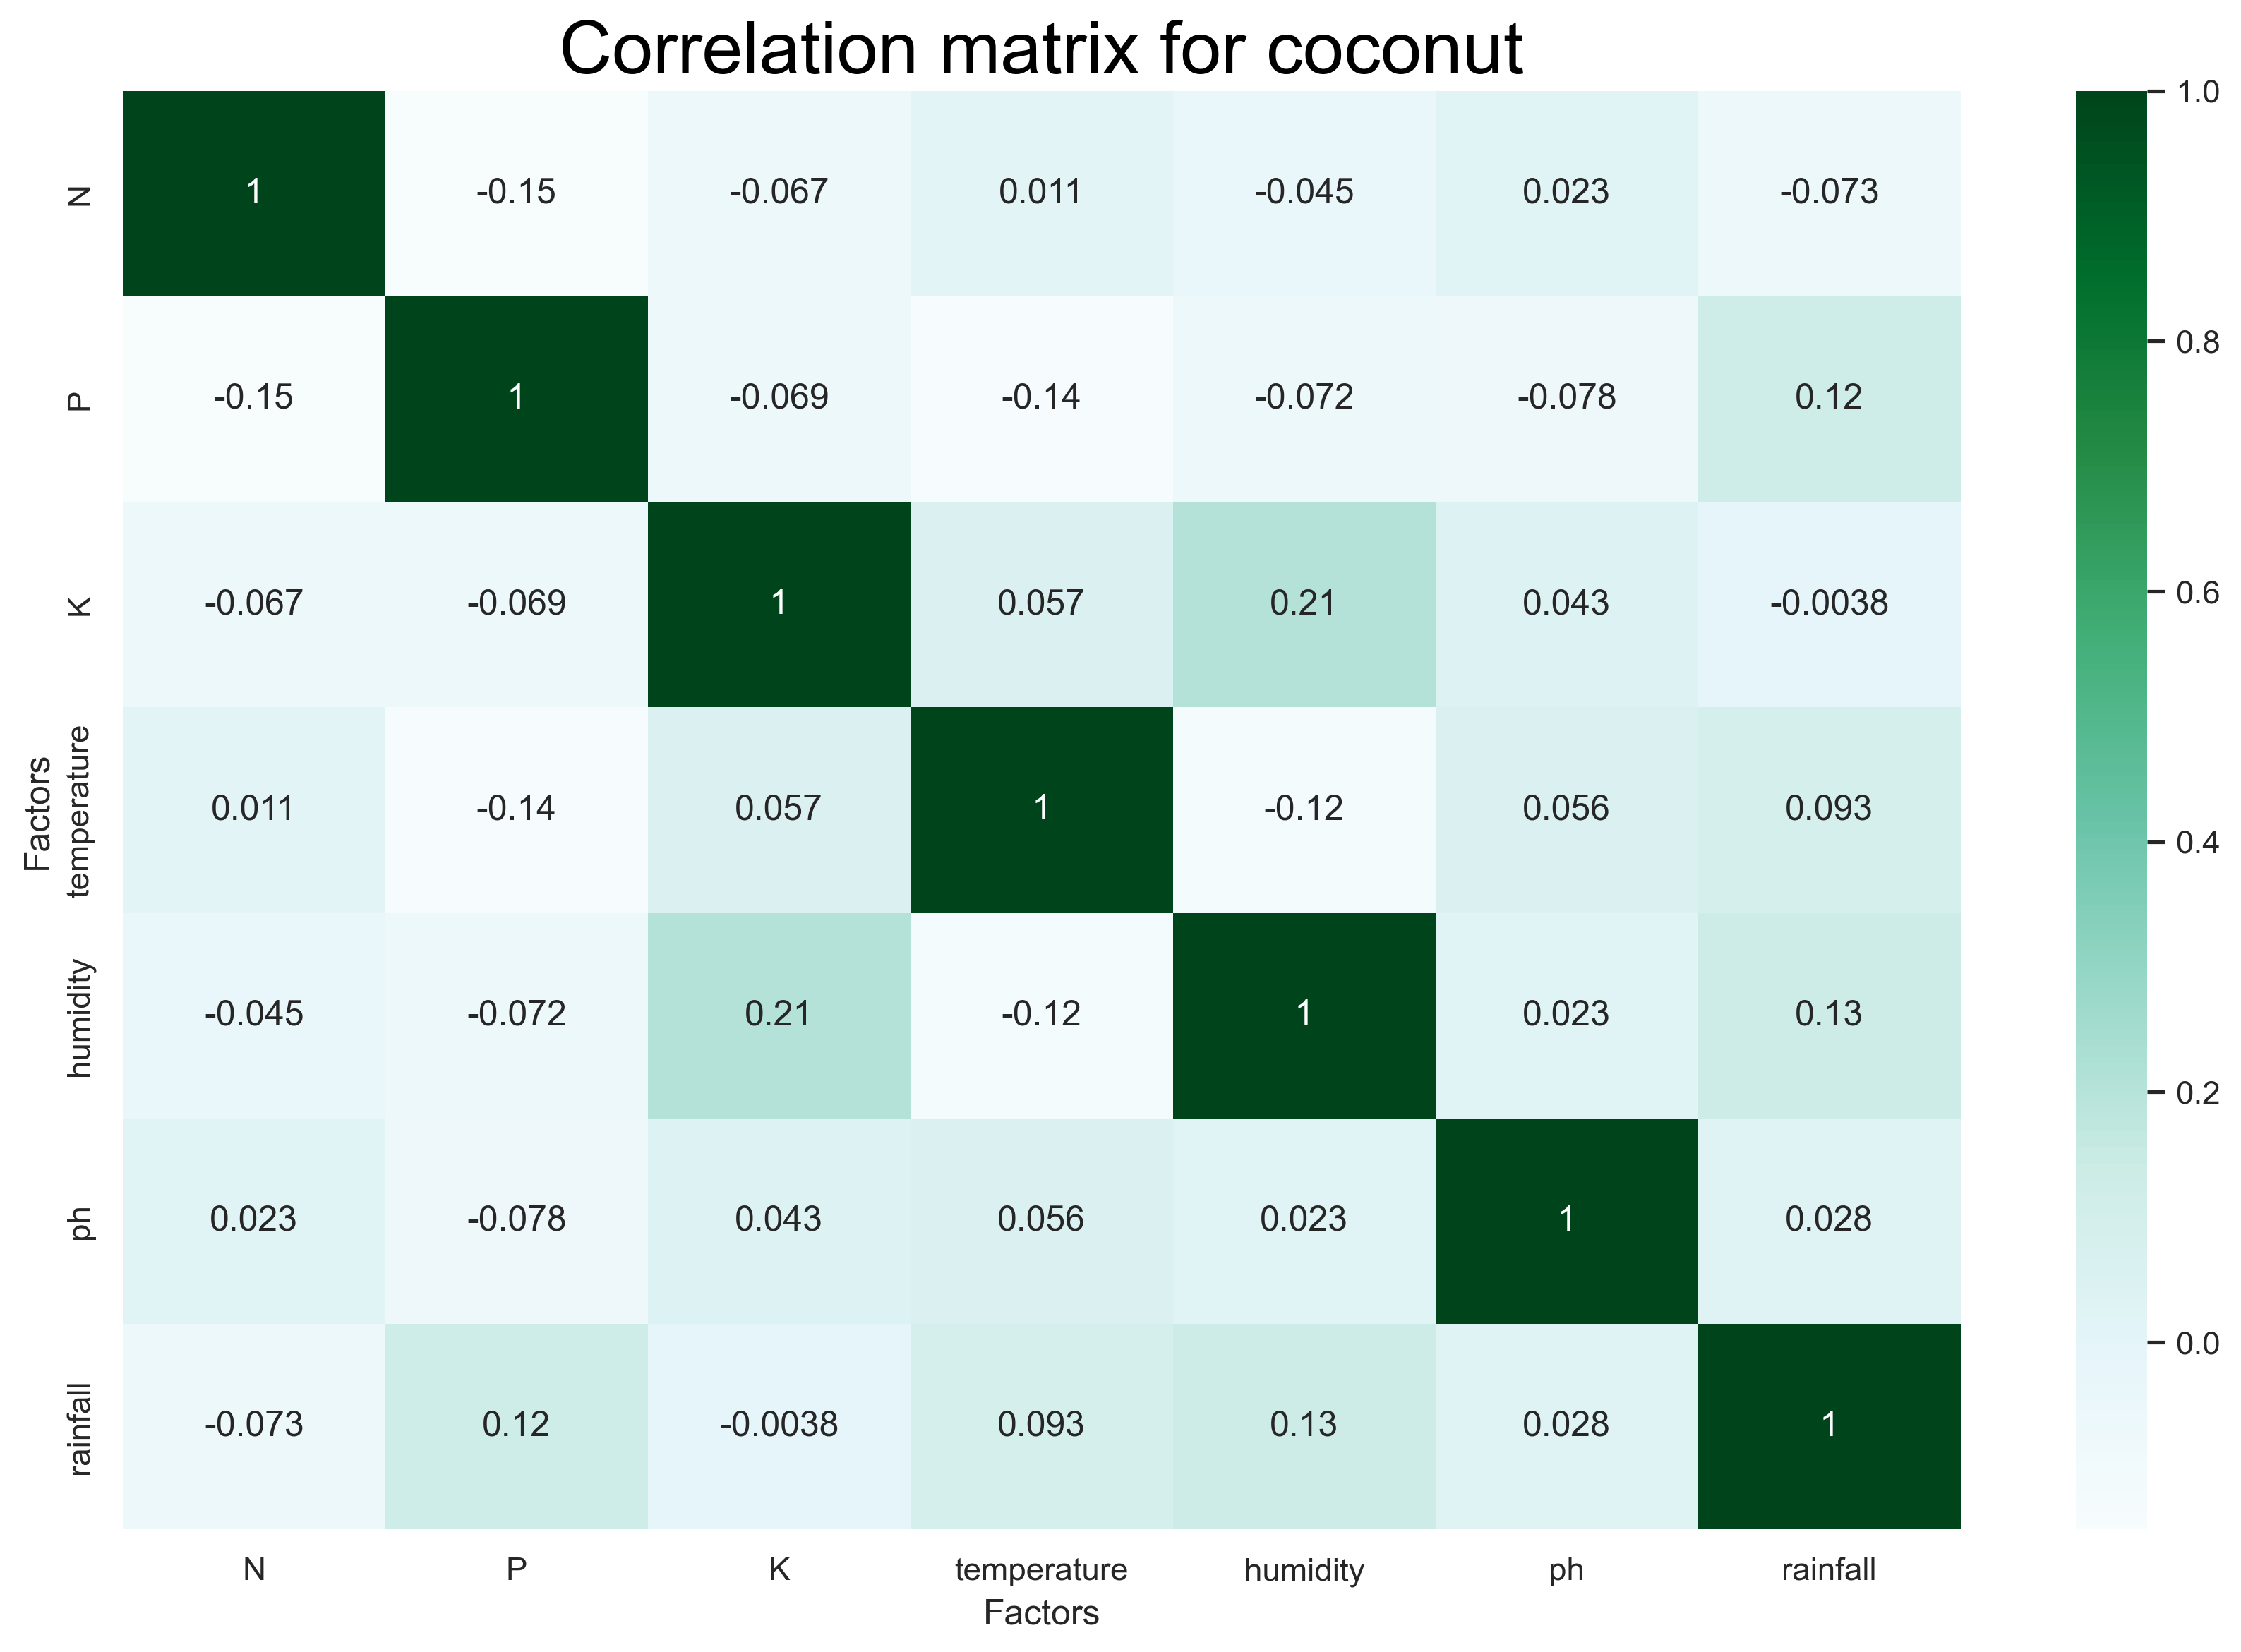

In [45]:
corr_coconut = crop[crop["label"]=="coconut"].corr()

coconut, ax = plt.subplots(1, 1, figsize=(14, 9), dpi=200)
sns.heatmap(corr_coconut, annot=True,cmap='BuGn')
ax.set(xlabel='Factors')
ax.set(ylabel='Factors')

plt.title('Correlation matrix for coconut', fontsize = 25, c='black')
plt.show()


coconut.savefig('corr_coconut.png')

# Logistic Regression

In [46]:
# X/y split
X = crop.drop('label',axis = 1)
y = crop['label']

In [48]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
#apply StandardScaler()
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,N,P,K,temperature,humidity,ph,rainfall
1975,2.253671,0.075557,-0.591411,-0.334780,0.561158,0.286398,-0.588381
1287,-0.584345,2.068341,2.903858,3.300466,0.436518,-1.099037,-0.550532
760,-0.692459,0.437882,-0.571775,0.785730,-0.325865,0.835318,-0.651556
267,-0.260000,0.468076,0.665315,-1.093185,-2.474061,0.318397,-0.624433
2007,0.523833,-0.316961,-0.159411,-0.225104,0.781511,-0.390448,1.184693


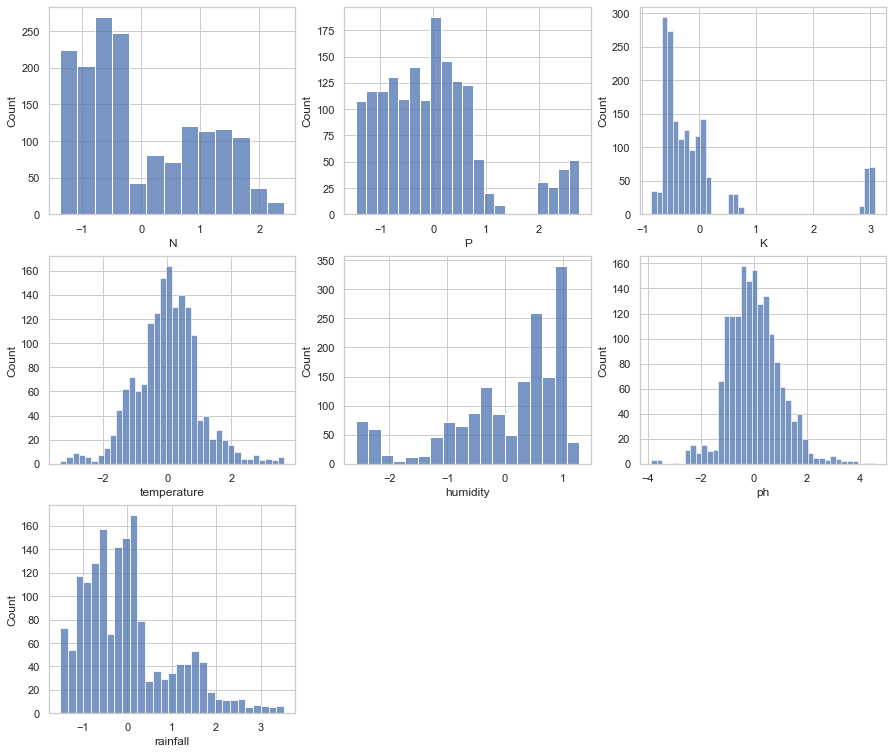

In [52]:
#would like to see how this looks in a histogram
histogram1 = plt.figure(figsize=(15,13))
i = 1
for column in X_train_scaled:
    plt.subplot(3,3,i)
    sns.histplot(X_train_scaled[column])
    i+=1
plt.show()

Apart from scaling the df looks the same.

In [53]:
y_train.head()

1975       cotton
1287       grapes
760     blackgram
267      chickpea
2007         jute
Name: label, dtype: object

In [54]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 

In [55]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [56]:
lr.predict_proba(X_train_scaled)

array([[1.45112577e-07, 4.65370371e-03, 1.30474106e-04, ...,
        2.26324898e-07, 3.98553903e-06, 1.55755323e-03],
       [4.05225922e-02, 1.89890357e-02, 3.71597976e-05, ...,
        3.47003540e-06, 1.88231228e-13, 3.66866884e-09],
       [6.31690681e-05, 7.88603641e-04, 6.67163684e-01, ...,
        1.42787818e-03, 1.57261439e-07, 4.42531346e-05],
       ...,
       [1.08008290e-04, 5.06601370e-03, 5.83046755e-01, ...,
        2.20925577e-03, 1.16262387e-06, 2.23032077e-04],
       [8.92229863e-06, 1.85095049e-04, 1.54449174e-01, ...,
        1.47492206e-03, 4.56397801e-08, 3.78907776e-04],
       [1.20985045e-05, 1.80115200e-07, 1.18978412e-05, ...,
        1.25969487e-01, 6.45474433e-05, 3.99106448e-04]])

In [57]:
lr.predict_proba(X_train_scaled)[0,0] + lr.predict_proba(X_train_scaled)[0,1]

0.004653848825993733

In [58]:
lr.predict_proba(X_train_scaled).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [59]:
lr.predict_proba(X_train_scaled).shape

(1650, 22)

In [60]:
lr.predict_proba(X_train_scaled)[:5,1] # Rows up to 5 and second column

array([4.65370371e-03, 1.89890357e-02, 7.88603641e-04, 1.12705288e-06,
       1.01451990e-02])

In [61]:
lr.predict_proba(X_train_scaled)[:5,0] # Rows up to 5 and first column

array([1.45112577e-07, 4.05225922e-02, 6.31690681e-05, 2.61980642e-08,
       9.41402508e-03])

In [62]:
lr.predict(X_train_scaled)

array(['cotton', 'grapes', 'blackgram', ..., 'blackgram', 'lentil',
       'orange'], dtype=object)

In [63]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

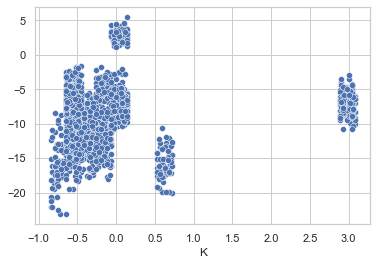

In [72]:
sns.scatterplot(y = logits,x = X_train_scaled['K']);
plt.show()

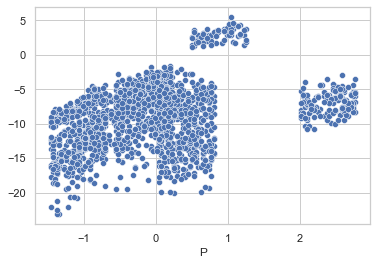

In [71]:
sns.scatterplot(y = logits,x = X_train_scaled['P']);
plt.show()

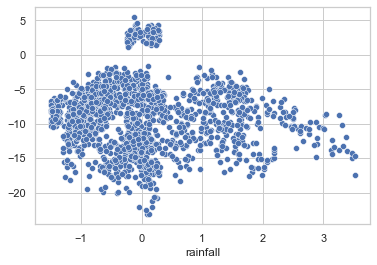

In [73]:
sns.scatterplot(y = logits,x = X_train_scaled['rainfall']);
plt.show()

## Accuracy of the Model

In [75]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.96


In [81]:
# a closer look
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
# print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
# print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
# print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.96
The Kappa in the TEST set is: 0.96


# Confusion Matrix

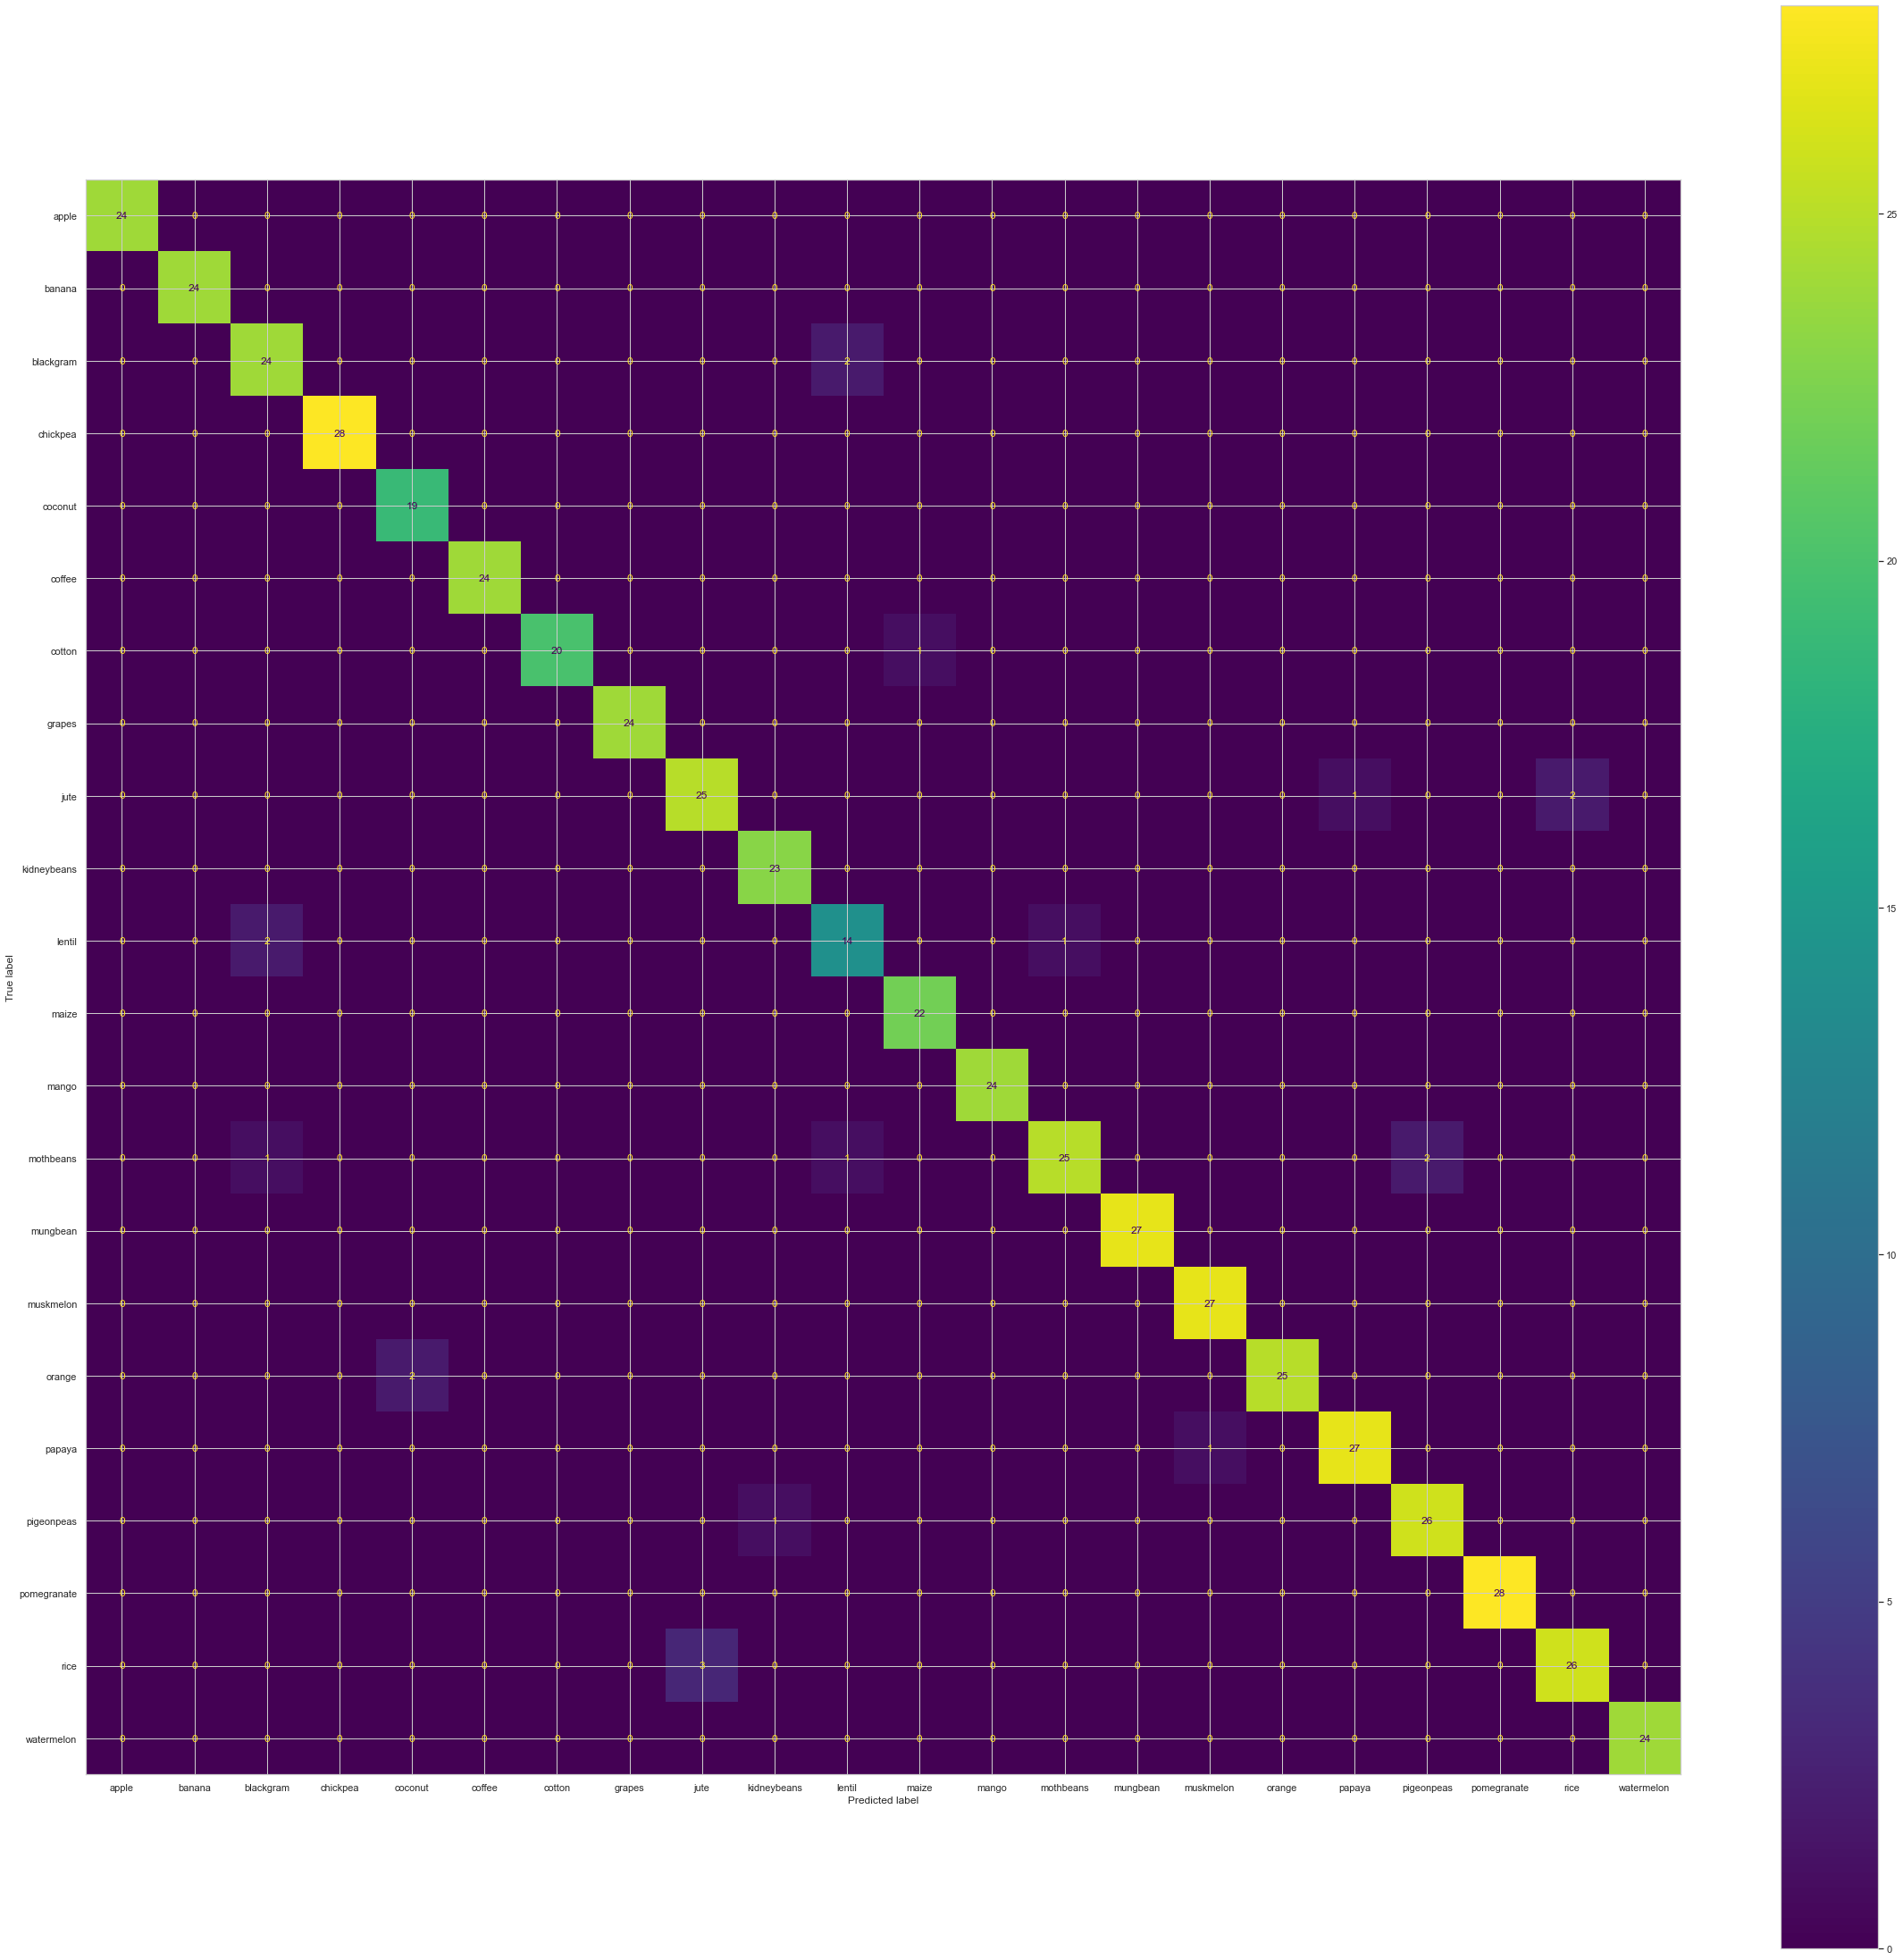

In [99]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)

fig, ax = plt.subplots(figsize=(40,40))
disp.plot(ax=ax)

# KNN

In [101]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [102]:
# Here .score will return the R2 of the model
knn_score = knn.score(X_test, y_test)
print("The R2 of the k-NN model is {:.2f}".format(knn_score))

TypeError: unsupported operand type(s) for /: 'str' and 'int'